In [ ]:
import pandas as pd 
from math import radians, cos, sin, sqrt, asin
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#read the file 
df_taxi = pd.read_csv("E:\project 5 random forest\TaxiFare.csv")

In [ ]:
df_taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df_taxi = df_taxi.drop("unique_id", axis = 1)

In [ ]:
df_taxi.shape

(50000, 7)

In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [ ]:
#Data preparation is the process of cleaning and transforming raw data before building predictive models.

#Here we will analyze and prepare data to perform regression techniques:
#1. Check dimensions of the dataframe in terms of rows and columns
#2. Check the data types. If not as per business context, change the data types
#3. Study Summary Statistics
#4. Distribution of Variables
#5. Analyze relationship between numeric variables
#6. Check for missing values
#7. Study correlation
#8. Analyze relationship between numeric and categoric variables

#Note: It is an art to explore data and one will need more and more practice to gain expertise in this area. 

In [ ]:
df_taxi.shape

(50000, 7)

In [ ]:
type(df_taxi.date_time_of_pickup[0])

str

In [ ]:
df_taxi.date_time_of_pickup[0]

'2009-06-15 17:26:21 UTC'

In [ ]:
#From the above output, we see that the data type of 'date_time_of_pickup' is 'object '.

#But according to data definition, 'date_time_of_pickup 'is a date time stamp variable, 
#which is wrongly interpreted as 'object', so we will convert this variable data type to 'datetime'.

In [ ]:
# convert object to datetime using to_datetime method from pandas
#if error is set to'coerce', then invalid parsing will be set as NaT.
df_taxi.date_time_of_pickup = pd.to_datetime(df_taxi.date_time_of_pickup, errors='coerce')

In [ ]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df_taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [ ]:
df_taxi.date_time_of_pickup[0]

Timestamp('2009-06-15 17:26:21+0000', tz='UTC')

In [ ]:
type(df_taxi.date_time_of_pickup[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#lets extrat the date month and etc from time stamp as it can be extracted from the pandas time stamp 

In [ ]:
df_taxi.date_time_of_pickup[0].hour

17

In [ ]:
df_taxi.date_time_of_pickup[0].month

6

In [ ]:
foo = df_taxi.date_time_of_pickup.dt.hour #extracting hr form the time stamp and assigning it to the variable
 #.dt is to extract the hours from the entire pandas series

In [ ]:
foo

0        17
1        16
2         0
3         4
4         7
         ..
49995    23
49996    17
49997     4
49998     7
49999     8
Name: date_time_of_pickup, Length: 50000, dtype: int64

In [ ]:
#For feature engineering, we do the following:

#1. Feature addition
#2. Drop the redundant variables 

In [ ]:
# extract various date time components as seperate variables
#.assign() creates multiple columns in the dataframe
df_taxi = df_taxi.assign(hour = df_taxi.date_time_of_pickup.dt.hour, #.dt is to extract the hours from the entire pandas series
                         day = df_taxi.date_time_of_pickup.dt.day,
                        month = df_taxi.date_time_of_pickup.dt.month, 
                        year = df_taxi.date_time_of_pickup.dt.year, 
                        dayofweek = df_taxi.date_time_of_pickup.dt.dayofweek)

In [ ]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [ ]:
#We will add a new variable which measures the distance between the pickup and dropoff point. 
#We will use the Haversine formula to compute the distance between two points of the journey, using the logitude and latitude values. 

In [ ]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [ ]:
# incorrect_coordinates = df_taxi.loc[(df_taxi.latitude_of_pickup > 90) |(df_taxi.latitude_of_pickup < -90) |
#                                    (df_taxi.latitude_of_dropoff > 90) |(df_taxi.latitude_of_dropoff < -90) |
#                                    (df_taxi.longitude_of_pickup > 180) |(df_taxi.longitude_of_pickup < -180) |
#                                    (df_taxi.longitude_of_dropoff > 90) |(df_taxi.longitude_of_dropoff < -90)
#                                     ].index
# df_taxi.drop(incorrect_coordinates, inplace = True, errors = 'ignore')


In [ ]:
# from geopy import distance
# dist_km = []
# for i in range(len(df_taxi.latitude_of_pickup)):
#     coords_1 = (df_taxi.latitude_of_pickup.values[i], df_taxi.longitude_of_pickup.values[i])
#     coords_2 = (df_taxi.latitude_of_dropoff.values[i], df_taxi.longitude_of_dropoff.values[i])
#     c = float(distance.distance(coords_1, coords_2).km)
#     df_taxi[dist_km] = dist_km.append(c)    
    
    





In [ ]:
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):#Accepts 4 numpy arrays as arguments from the below code 
    travel_dist = [] # we are crearing the empty list and it Will contain the list of 50000(total number of rows) distances
    
    for i in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]]) #Converting 4 values to radians and maping it 
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371 #'c' contains trip distance for just one row
        travel_dist.append(c)
       
    return travel_dist
#so whats happening here is first we have transformed the values to numpy array and passing the transformed values to the defined function 
#called distance_transformed and storing the values in the travel_dist list now we run a for loop and do maths and return the values and 
# finally store it in the travel_dist_km

In [ ]:
#new column 'travel_dist_km' gets created and Converting a column to numpy array
df_taxi['travel_dist_km'] = distance_transform(df_taxi['longitude_of_pickup'].to_numpy(), 
                                                df_taxi['latitude_of_pickup'].to_numpy(),
                                               df_taxi['longitude_of_dropoff'].to_numpy(),
                                                df_taxi['latitude_of_dropoff'].to_numpy()
                                              )
#this can be done by pd.apply funtion too

In [ ]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [ ]:
# drop the column 'date_time_of_pickup' using drop()
# 'axis = 1' drops the specified column

df_taxi = df_taxi.drop('date_time_of_pickup',axis=1)

In [ ]:
df_taxi.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
 11  travel_dist_km        50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.6 MB


In [ ]:
#4.1.3 Summary Statistics

#Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.
#Image 	
#In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables

#1. For numerical variables, use the describe()
#2. For categorical variables use the describe(include='object') 

In [ ]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
# use .transpose() for better readability. However it is optional
df_taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
day,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [ ]:
#Importance of detecting an outlier

#An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease. Let us detect the extreme values in the data.

#The following can be considered as outliers in this case study:

#    Amount < 2.5
#    Trips with travel distance less than or equal to 0, and more than 130Kms
#    Trips where 90< latitude <-90, 180 < longitude < -180

#    We have seen that there are instances of amount less that 0 as well in the data set, where as the minimum fare for any trip in NYC is 2.5 dollars, hence we will remove such observations. We have already seen that the max fare is 200 in the data set.



In [ ]:
#We will only keep the observation where fare is between 2.5
df_taxi = df_taxi.loc[(df_taxi.amount >= 2.5)]

In [ ]:
print("Remaining observastions in the dataset:", df_taxi.shape)

Remaining observastions in the dataset: (49990, 12)


In [ ]:
#We will only keep the observation where travel distance is less than or equal to 130
df_taxi = df_taxi.loc[(df_taxi.travel_dist_km >= 1) | (df_taxi.travel_dist_km <= 130)]
print("Remaining observastions in the dataset:", df_taxi.shape)

Remaining observastions in the dataset: (49990, 12)


In [ ]:
incorrect_coordinates = df_taxi.loc[(df_taxi.latitude_of_pickup > 90) |(df_taxi.latitude_of_pickup < -90) |
                                   (df_taxi.latitude_of_dropoff > 90) |(df_taxi.latitude_of_dropoff < -90) |
                                   (df_taxi.longitude_of_pickup > 180) |(df_taxi.longitude_of_pickup < -180) |
                                   (df_taxi.longitude_of_dropoff > 90) |(df_taxi.longitude_of_dropoff < -90)
                                    ].index
#.loc function is used to select the row and columns based on labels and columns name . Access a group of rows and columns by label(s) or a boolean array. 

In [ ]:
df_taxi.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
df_taxi.shape

(49989, 12)

In [ ]:
# ther is no missing values

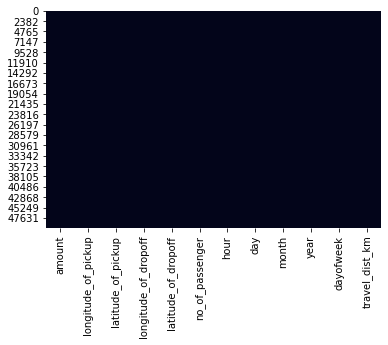

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df_taxi.isnull(), cbar=False)

# display the plot
plt.show()

In [ ]:
#To check the correlation between numerical variables, we perform the following steps:

#1. Compute a correlation matrix
#2. Plot a heatmap for the correlation matrix 

In [ ]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_taxi.corr()

# print the correlation matrix
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
amount,1.000000,0.005905,-0.006563,0.004452,-0.005600,0.016506,-0.022009,-0.001417,0.026742,0.121081,0.000542,0.016451
longitude_of_pickup,0.005905,1.000000,-0.984132,0.956613,-0.947401,-0.005614,0.004913,0.006008,0.000402,-0.001264,-0.003224,0.143712
latitude_of_pickup,-0.006563,-0.984132,1.000000,-0.943741,0.961374,0.003982,-0.004313,-0.008884,0.000498,-0.000925,0.001911,-0.130943
longitude_of_dropoff,0.004452,0.956613,-0.943741,1.000000,-0.982102,-0.004874,0.005506,0.005221,0.001322,-0.000327,-0.002441,0.143172
latitude_of_dropoff,-0.005600,-0.947401,0.961374,-0.982102,1.000000,0.002898,-0.004530,-0.008012,-0.000341,-0.001817,0.001626,-0.124844
no_of_passenger,0.016506,-0.005614,0.003982,-0.004874,0.002898,1.000000,0.011400,0.006787,0.009099,0.006385,0.038581,-0.005371
hour,-0.022009,0.004913,-0.004313,0.005506,-0.004530,0.011400,1.000000,-0.008192,-0.001916,0.004167,-0.091267,0.000644
day,-0.001417,0.006008,-0.008884,0.005221,-0.008012,0.006787,-0.008192,1.000000,-0.017266,-0.011155,0.008422,0.010610
month,0.026742,0.000402,0.000498,0.001322,-0.000341,0.009099,-0.001916,-0.017266,1.000000,-0.115726,-0.010004,-0.009217
year,0.121081,-0.001264,-0.000925,-0.000327,-0.001817,0.006385,0.004167,-0.011155,-0.115726,1.000000,0.006808,0.022136


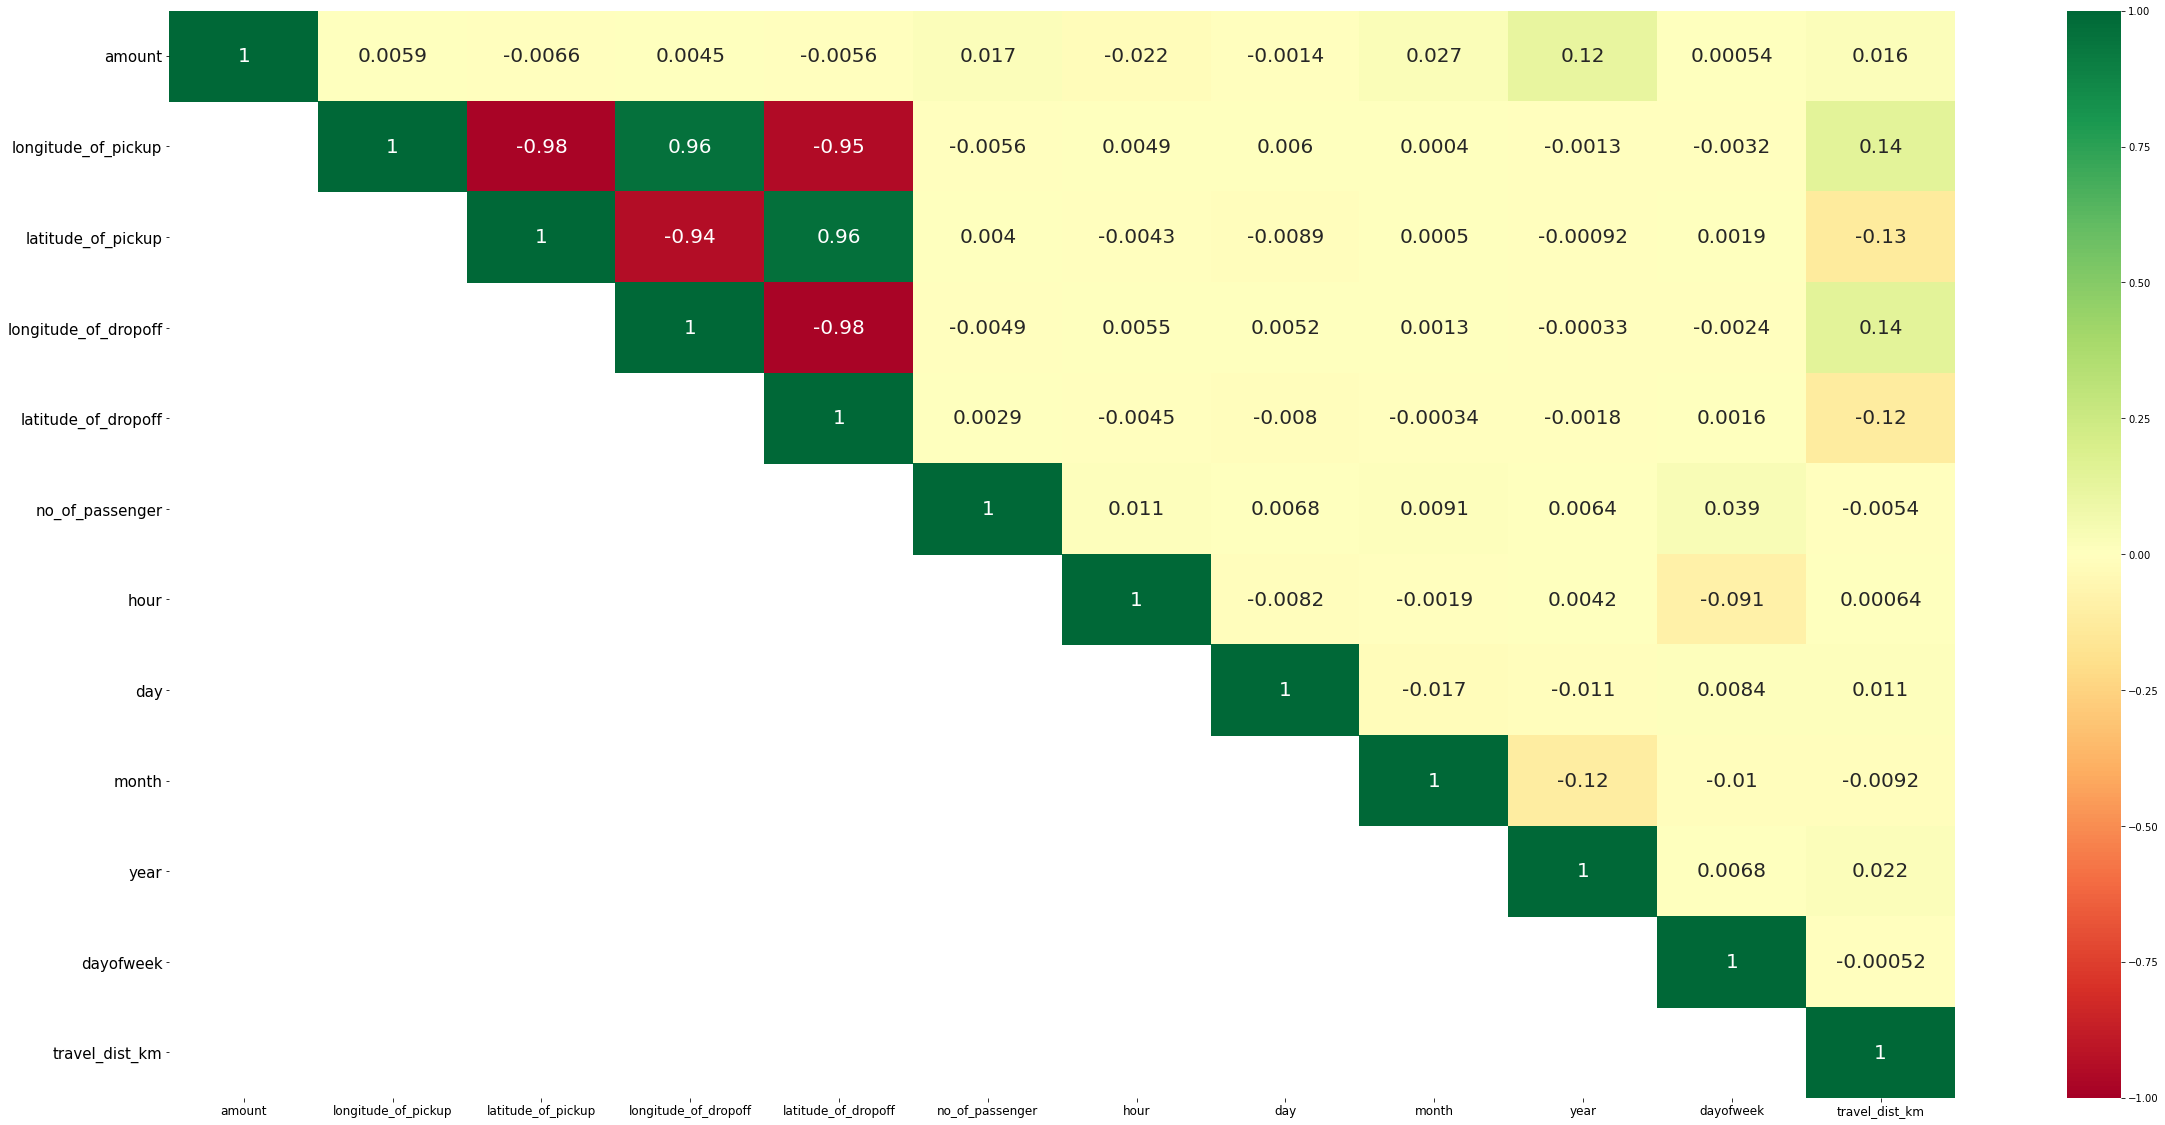

In [ ]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (40,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask, k = -1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

<AxesSubplot:>

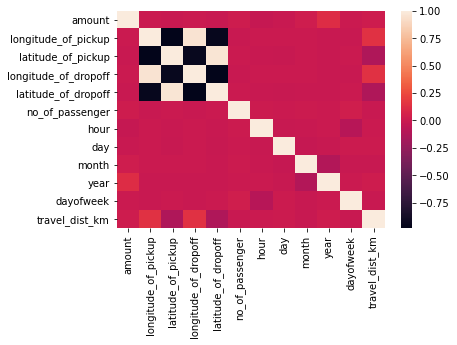

In [ ]:
sns.heatmap(corr)

In [ ]:
# 4.2 Exploratory Data Analysis

# 4.2.1 Peak hours

# We will check for the business during the weekdays and weekends.

# We will check the peak hours during the following:

# 1. Weekdays
# 2. Weekends 

<AxesSubplot:xlabel='hour', ylabel='count'>

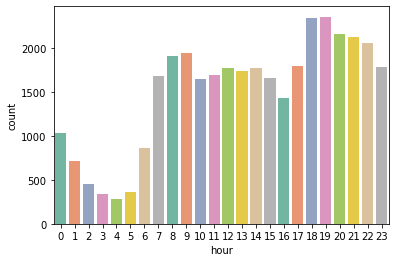

In [ ]:
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <=4)], palette='Set2') #here 0 is monday and so on

In [ ]:
# We see that during the weekdays the count of trips start to peak from 8 am and is highest at 9am. In the evening the peak is at 6pm and 7pm.

In [ ]:
# 2. Plot a countplot to check the peak hours during weekends

<AxesSubplot:title={'center':'Taxi trips count during week ends'}, xlabel='hour', ylabel='count'>

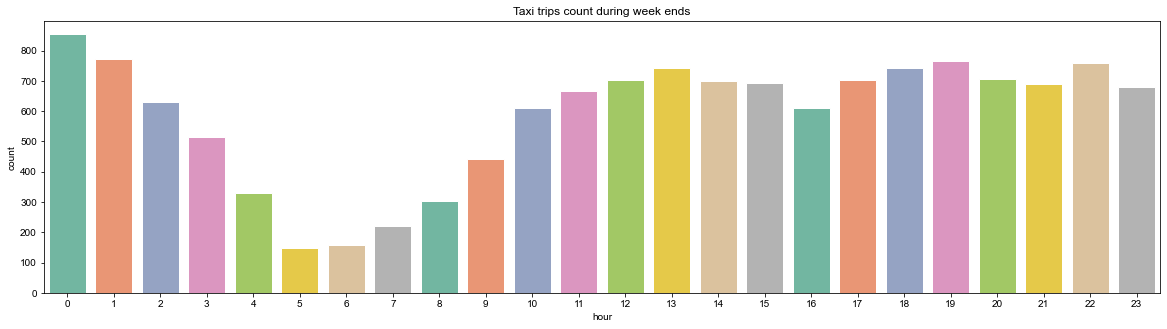

In [ ]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during week ends')
sns.set_style("white")
#plot the countplot for weekends
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <=6)], palette='Set2')

In [ ]:
#We see that during the weekends the count of trips is high after 12 midnight to 3am to 4am. 
#This pattern is different from the weekdays. In the evening the demand is almost evenly high after 6pm till late night except.


In [ ]:
# 4.2.2 Mean fare for each hour during weekdays and weekends

# We will check the mean fares for each hour during the weekdays and weekends.

# We will do the following:

# 1. Compute the mean hourly fare for weekdays and weekends
# 2. Plot the bar graph for the same 

In [ ]:
# Set the days in the dataset as week days and week ends
week_days = df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <= 4)]
week_ends = df_taxi.loc[(df_taxi.dayofweek >= 5) & (df_taxi.dayofweek <= 6)]
# compute the mean fare amount over the week day and week end.
# use groupby('hour') to get the mean fare for each hour
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index() #to_frame() converts series to dataframe
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

<ipython-input-115-33b44931066d>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(1,1,1)


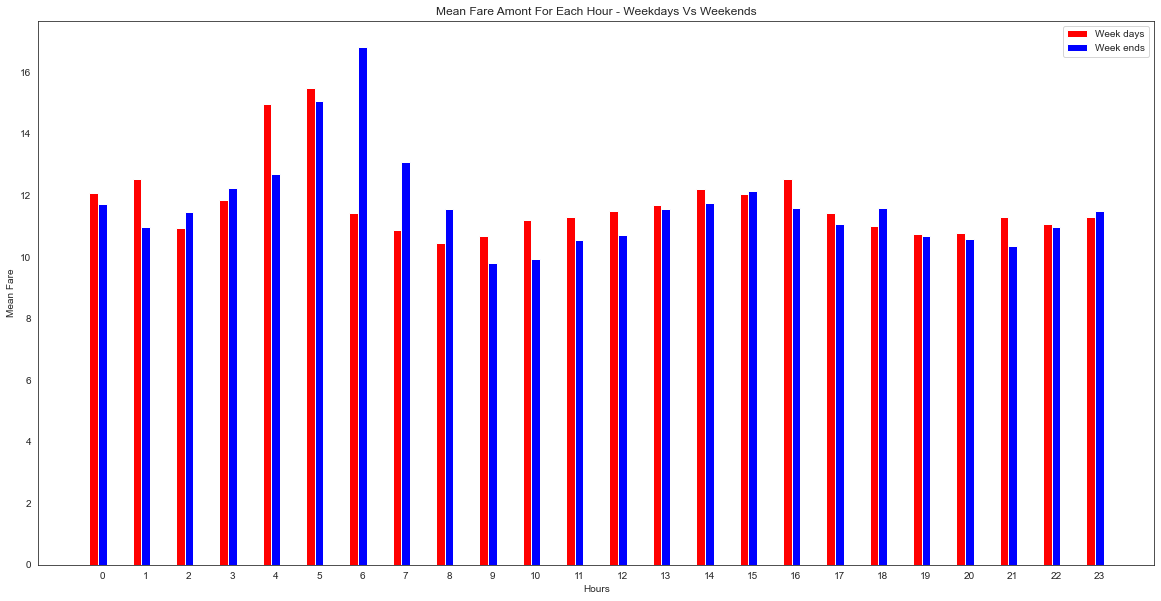

In [ ]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amont For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Week days')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Week ends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

In [ ]:
#We notice that the mean fares for each hour are different for week days and week ends. 
#Mean fare for weekdays during morning hours 6,7 and 8 is lmuch ess compared to weekends.

In [ ]:
# 4.2.3 Distribution of key numerical vairables¶

# We will check the distribustion of 'travel_dist_km' and 'amount'

# We will check the distribution of the following variables:

# 1. 'amount'
# 2. 'travel_dist_km' 

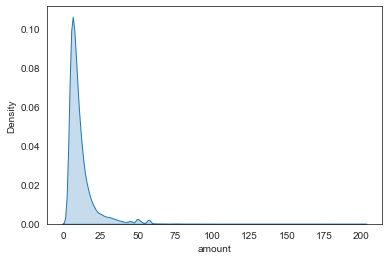

In [ ]:
# 1. Distribution of fare 'amount'
snsplot = sns.kdeplot(df_taxi.amount, shade=True)

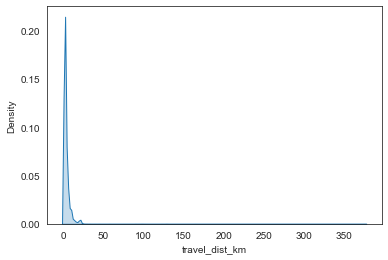

In [ ]:
# 2. Distribustion of the travel distance in km
sns.plot = sns.kdeplot(df_taxi[df_taxi.travel_dist_km<600].travel_dist_km, shade=True)

In [ ]:
# 5. Random Forest

# It is an example of the Bagging technique. It constructs multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees.

# 5.1 Random Forest Model

# In this section we build a model using random forest regressor.

# In order to build the model, we do the following:

# 1. Split the features and target into seperate data frames
# 2. Split the data into training and test sets
# 3. Build model
# 4. Predict the values using test set
# 5. Compute accuracy measures
# 6. Tabulate the results

# 1. Split the data into features and target dataframes

# Store the amount variable which is the target variable, into y.


In [ ]:
# select only the target variable 'amount' and store it in dataframe 'y'
y = pd.DataFrame(df_taxi['amount'])

In [ ]:
# use 'drop()' to remove the variable 'amount' from df_taxi
# 'axis = 1' drops the corresponding column(s)
X = df_taxi.drop('amount',axis = 1)

In [ ]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


In [ ]:

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (34992, 11)
The shape of X_test is: (14997, 11)
The shape of y_train is: (34992, 1)
The shape of y_test is: (14997, 1)


In [ ]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-131-114d8cc06ea3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [ ]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

In [ ]:
y_pred[0]

8.326

In [ ]:
# 4. Compute accuracy measures

# Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.


In [ ]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 2.068533828114829
Mean Squared Error (MSE): 19.630229608323198
Root Mean Squared Error (RMSE): 4.430601495093324


In [ ]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,2.068534,19.63023,4.430601


In [ ]:
# 5.2 Random Forest with GridSearchCV

# Now we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

# The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.
# Image 	
# Now we build a random forest using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

# To build a Random Forest using GridSearchCV, we do the following:
# 1. Use GridSearch to obtain the optimal values of hyperparameters
# 2. Build the model using the hyperparameters obtained in step 1
# 3. Do predictions on the test set
# 4. Compute accuracy measures
# 5. Tabulate the results 

In [ ]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10]
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

In [ ]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed

Best parameters for random forest regressor:  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 85} 



In [ ]:
#2. Build the model using the hyperparameters obtained in step 1

In [ ]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

<ipython-input-150-ae62adb0099f>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_grid_model = dt_grid_model.fit(X_train, y_train)


In [ ]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(X_test)

In [ ]:
# 4. Compute accuracy measures

# Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.


In [ ]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 2.108015582329935
Mean Squared Error (MSE): 19.952915628853532
Root Mean Squared Error (RMSE): 4.466868660354089


In [ ]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,2.068534,19.630230,4.430601
1,Random Forest,2.108016,19.952916,4.466869


In [ ]:
# 6. Conclusion and Interpretation
# The regression algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using MAE, MSE,RMSE.

# The above result shows that the RMSE value for both the model is much less than the standard deviation of the 'amount' (target) variable. Both the models have performed well. We can further fine tune the model for various hyperparameter values. 